<h1> ACTIVITY 2 - ACCIDENTS DATA ANALYTICS PROJECT</h1>
<hr>

<h3>ANALYST: Mark Angelo Salazar</h3>
<hr>

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings ('ignore')

In [3]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident['Latitude']=accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude']=accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions']=accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type']=accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area']=accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions']=accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [9]:
accident['Index']=accident['Index'].astype('category')
accident['Accident_Severity']=accident['Accident_Severity'].astype('category')
accident['Accident Date']=accident['Accident Date'].astype('category')
accident['Light_Conditions']=accident['Light_Conditions'].astype('category')
accident['District Area']=accident['District Area'].astype('category')
accident['Road_Surface_Conditions']=accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type']=accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area']=accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions']=accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type']=accident['Vehicle_Type'].astype('category')
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>1.What is the average number of accidents in the dataframe?</h2>

In [10]:
total_accident= len(accident)

In [11]:
total_accident

660679

<h4>INSIGHT: The average number of accidents in the dataframe is 660679.</h4>

<h2>2.What is the distribution of accident severity?</h2>

In [12]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h4>INSIGHT: Most accidents are recorded slight in severity and fatal accidents is recorded as the least number in severity.</h4>

<h2>3.What is the average number of casualties for every accident?</h2>

In [13]:
casualties_accident = accident['Number_of_Casualties'].mean()

In [14]:
casualties_accident

np.float64(1.357040257068864)

<h4>INSIGHT:There are about 1.36 casualties per accident.</h4>

<h2>4.How many accidents occurred during daylight versus darkness?</h2>

In [15]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h4>INSIGHT: Most accidents happened during the day (484,880). Fewer accidents happened at night with streetlights (129,335).</h4>

<h2>5.Which district area has the most number of accidents?.</h2>

In [16]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h4>INSIGHT: Birmingham has the most number of accidents a total of 13,439 and the area that has the least number of accidents with the total of 91. </h4>

<h2>6.What area has the most casualties per accident?</h2>

In [17]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h4>INSIGHT: Urban area has the most number of casualties per accident with the total of 421,678 than rural area.</h4>

<h2>7.What weather condition has the largest number of accident?</h2>

In [18]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h4>INSIGHT: The weather condition that has the highest number of accident is in fine no high winds.</h4>

<h2>8.Which district has the highest average casualties per accident?</h2>

In [19]:
accident.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False).head(10)

District Area
Blaeu Gwent          1.693694
West Somerset        1.613990
Derwentside          1.606186
Chester-le-Street    1.603306
Durham               1.580431
Blaenau Gwent        1.579310
Fylde                1.569350
Hambleton            1.568523
Merthyr Tydfil       1.568182
West Lancashire      1.566341
Name: Number_of_Casualties, dtype: float64

<h4>INSIGHT: Bleau Gwent district has the highest number of casualties with the total average of 1.69.</h4>

<h2>9.What is the total number of Accident Severity in a Single carriageway?</h2>

In [20]:
single_carriageway= accident[accident['Road_Type'] == 'Single carriageway']
single_carriageway['Accident_Severity'].value_counts()

Accident_Severity
Slight     419563
Serious     70540
Fatal        6560
Name: count, dtype: int64

<h4>INSIGHT: On single carriageway roads, slight accidents are the most frequent with 419,563 cases. Serious accidents occur less often at 70,540 cases, while fatal accidents are the least common with 6,560 cases.</h4>

<h2>10.What is the total number of Accident Severity in a double carriageway?</h2>

In [21]:
dual_carriageway= accident[accident['Road_Type'] == 'Dual carriageway']
dual_carriageway['Accident_Severity'].value_counts()

Accident_Severity
Slight     85863
Serious    11746
Fatal       1815
Name: count, dtype: int64

<h4>INSIGHT: On dual carriageway roads, slight accidents are the most frequent with 85,863 cases. Serious accidents occur less often at 11,746 cases, while fatal accidents are the least common with 1,815 cases.</h4>

<h2>11.Which vehicle type is most involved in accidents?</h2>

In [22]:
accident[accident['Accident_Severity'] == 'Fatal']['Vehicle_Type'].value_counts().head(5)

Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

<h4>INSIGHT: Car is the most vehicle involved in accidents</h4>

<h2>12.What road type is most involved accident?</h2>

In [23]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h4>INSIGHT: Single carriageways are the most involved road type in accidents with the average number of 496,663.</h4>

<h2>13.The vehicle accidents is related to the frequency of the number of casualties.</h2>

In [24]:
accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

np.float64(0.22888886126927627)

<h4>INSIGHT: The vehicle accidents is related to the frequency of the number of casualties.</h4>

<h2>14.Which weather condition has the lowest fatal level of accident severity?</h2>

In [25]:
accident.groupby(["Weather_Conditions", "Accident_Severity"]).size().unstack()

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


<h4>INSIGHT: The weather condition with the lowest fatal accident severity is Snowing + high winds with only a record of 3.
</h4>

<h2>15.In rural area what district has the most accident happened </h2>

In [26]:
accident.groupby(['District Area','Urban_or_Rural_Area']).count()

Index  Accident_Severity  Accident Date  \
District Area Urban_or_Rural_Area                                            
Aberdeen City Rural                  207                207            207   
              Unallocated              0                  0              0   
              Urban                 1116               1116           1116   
Aberdeenshire Rural                 1781               1781           1781   
              Unallocated              0                  0              0   
...                                  ...                ...            ...   
Wyre Forest   Unallocated              0                  0              0   
              Urban                  550                550            550   
York          Rural                  706                706            706   
              Unallocated              0                  0              0   
              Urban                 1191               1191           1191   

                                   Latitude  Light_Conditions  Longitude  \
District Area Urban_or_Rural_Area                                          
Aberdeen City Rural                     207               207        207   
              Unallocated                 0                 0          0   
              Urban                    1116              1116       1116   
Aberdeenshire Rural                    1781              1781       1781   
              Unallocated                 0                 0          0   
...                                     ...               ...        ...   
Wyre Forest   Unallocated                 0                 0          0   
              Urban                     550               550        550   
York          Rural                     706               706        706   
              Unallocated                 0                 0          0   
              Urban                    1191              1191       1191   

                                   Number_of_Casualties  Number_of_Vehicles  \
District Area Urban_or_Rural_Area                                             
Aberdeen City Rural                                 207                 207   
              Unallocated                             0                   0   
              Urban                                1116                1116   
Aberdeenshire Rural                                1781                1781   
              Unallocated                             0                   0   
...                                                 ...                 ...   
Wyre Forest   Unallocated                             0                   0   
              Urban                                 550                 550   
York          Rural                                 706                 706   
              Unallocated                             0                   0   
              Urban                                1191                1191   

                                   Road_Surface_Conditions  Road_Type  \
District Area Urban_or_Rural_Area                                       
Aberdeen City Rural                                    207        207   
              Unallocated                                0          0   
              Urban                                   1116       1116   
Aberdeenshire Rural                                   1781       1781   
              Unallocated                                0          0   
...                                                    ...        ...   
Wyre Forest   Unallocated                                0          0   
              Urban                                    550        550   
York          Rural                                    706        706   
              Unallocated                                0          0   
              Urban                                   1191       1191   

                                   Weather_Conditions

<h4>INSIGHT: Most Accidents that happened in rural area is in Aberdeenshire</h4>

<h2>16.Is the number of vehicles that has Impacts of the occurence of accidents in rural and urban areas.</h2>

In [27]:
from scipy.stats import f_oneway
f_stats, p_value = f_oneway(accident[accident['Urban_or_Rural_Area'] == 'Urban'] ['Number_of_Vehicles'],
                            accident[accident['Urban_or_Rural_Area'] == 'Rural'] ['Number_of_Vehicles'])
print(p_value)

ModuleNotFoundError: No module named 'scipy'

<h4>INSIGHT: The number of vehicles in urban or rural areas has an impacts to the occurrence of accidents.</h4>

<h2>17.What is the average number of vehicles per accident?</h2>

In [ ]:
accident['Number_of_Vehicles'].mean()

1.8312554205597575

<h4>INSIGHT: The average number of vehicles per accident is 1.83.</h4>

<h2>18.Which road type area reports the least accidents?</h2>

In [ ]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h4>INSIGHT: Slip road has recorded the least number of accidents.</h4>

<h2>19.Where is the most severe fatal accidents occur geographically?</h2>

In [ ]:
fatal = accident[accident['Accident_Severity'] == 'Fatal']
fatal[['Longitude','Latitude']].describe()

,Longitude,Latitude
count,8661.000000,8661.000000
mean,-1.546123,52.696000
std,1.450183,1.538523
min,-6.430902,50.083471
25%,-2.522856,51.517812
50%,-1.499085,52.436049
75%,-0.362033,53.501361
max,1.751490,60.321208


<h4>INSIGHT: Fatal accidents are concentrated around longitude of -1.55 and latitude of 52.70.</h4>

<h2>20.Which district area covers the highest accident-prone longitude/latitude range?</h2>

In [ ]:
accident.groupby('District Area')[['Longitude','Latitude']].mean().head()

,Longitude,Latitude
District Area,,
Aberdeen City,-2.129763,57.153023
Aberdeenshire,-2.328926,57.301687
Adur,-0.285832,50.836921
Allerdale,-3.364416,54.697110
Alnwick,-1.741380,55.369824


<h4>INSIGHT: District Aberdeen city covers the main accident-prone geographic center.</h4>

<h2>21.Accidents by month.</h2>

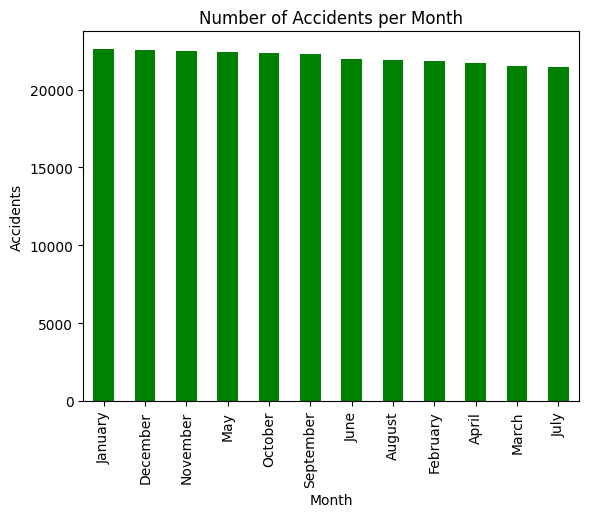

In [ ]:
import matplotlib.pyplot as plt
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')
accident['Month'] = accident['Accident Date'].dt.month_name()
accident['Month'].value_counts().plot(kind='bar', color= 'green')
plt.title("Number of Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Accidents")
plt.show()

<h2>22.Urban and rural accidents</h2>

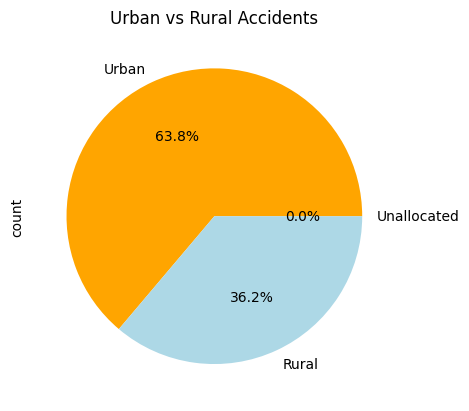

In [ ]:
accident['Urban_or_Rural_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange','lightblue'])
plt.title("Urban vs Rural Accidents")
plt.show()

<h2>23.Accidents per road type</h2>

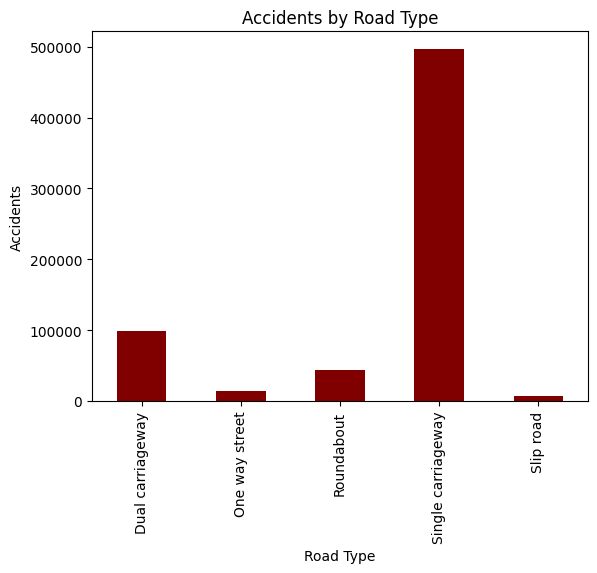

In [ ]:
accident['Road_Type'].value_counts().sort_index().plot(kind='bar', color = 'maroon')
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Accidents")
plt.show()

<h2>24.Number Vehicles and number of casualties</h2>

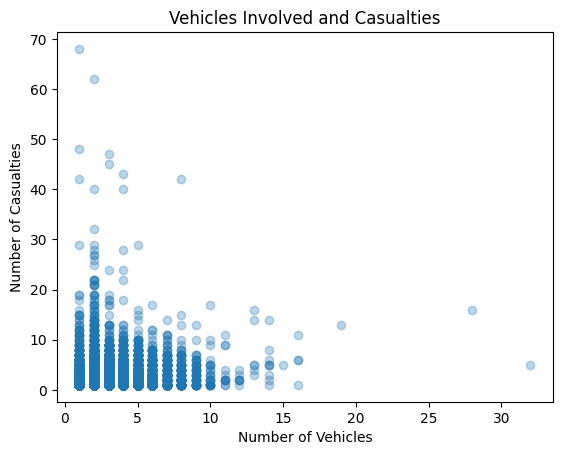

In [ ]:
plt.scatter(accident['Number_of_Vehicles'], accident['Number_of_Casualties'], alpha=0.3)
plt.title("Vehicles Involved and Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()

<h2>25. Accidents by road surface conditions</h2>

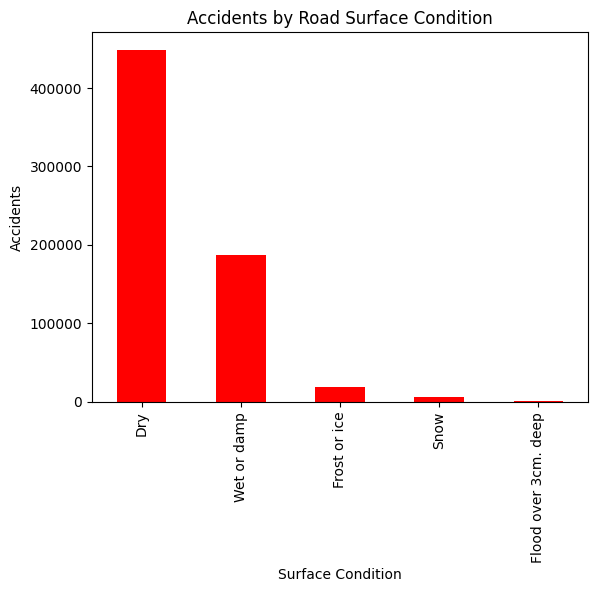

In [ ]:
accident['Road_Surface_Conditions'].value_counts().plot(kind='bar', color='red')
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Surface Condition")
plt.ylabel("Accidents")
plt.show()

<h2>26. Accidents by Day of Week</h2>

In [32]:
accident['Hour'] = pd.to_datetime(accident['Time'], errors='coerce').dt.hour
hour_counts = accident['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
hour_counts.plot(kind='line', marker='o', color='teal')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

KeyError: 'Time'

<h2>2: Accidents by Hour of Day</h2>

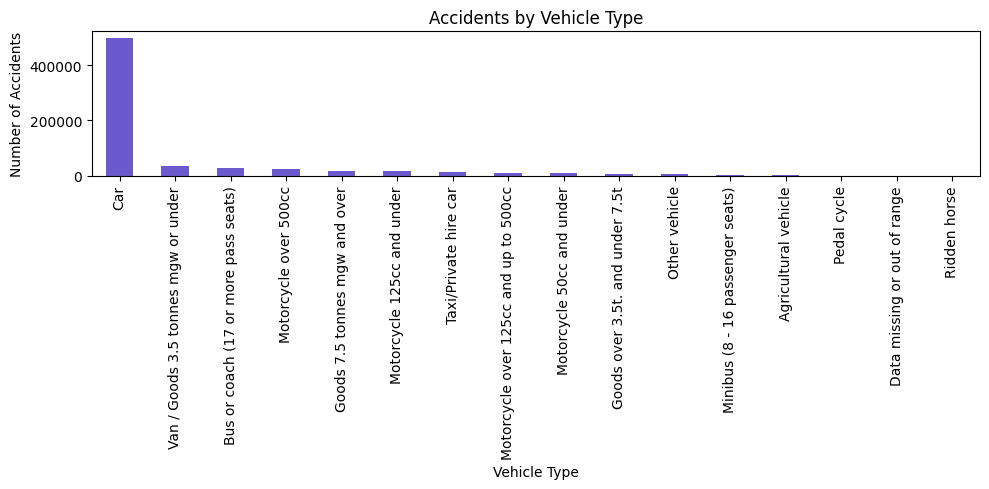

In [33]:
vehicle_counts = accident['Vehicle_Type'].value_counts()
plt.figure(figsize=(10,5))
vehicle_counts.plot(kind='bar', color='slateblue')
plt.title('Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

Accidents by Vehicle Type
This chart shows which vehicle types are most frequently involved in accidents.

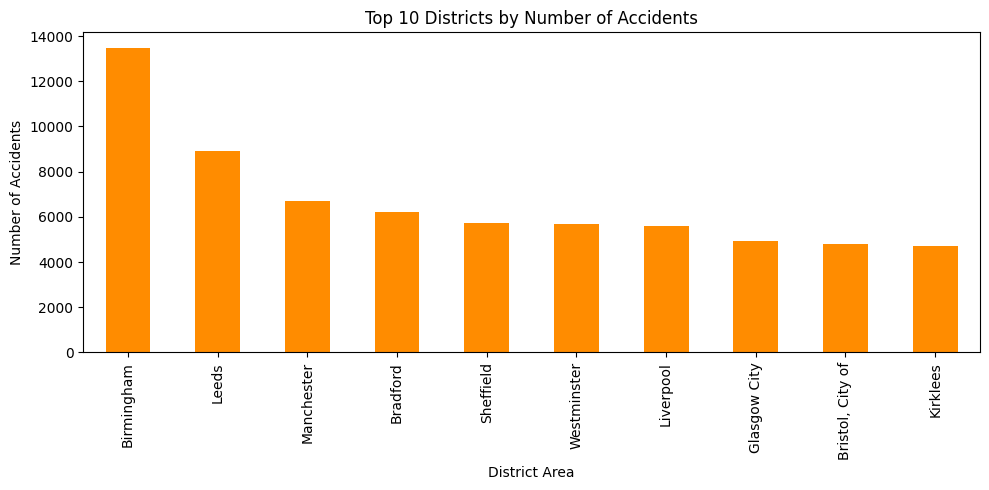

In [34]:
district_counts = accident['District Area'].value_counts().head(10)
plt.figure(figsize=(10,5))
district_counts.plot(kind='bar', color='darkorange')
plt.title('Top 10 Districts by Number of Accidents')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Visualization 4: Accidents by District Area
This chart shows which district areas have the most accidents.

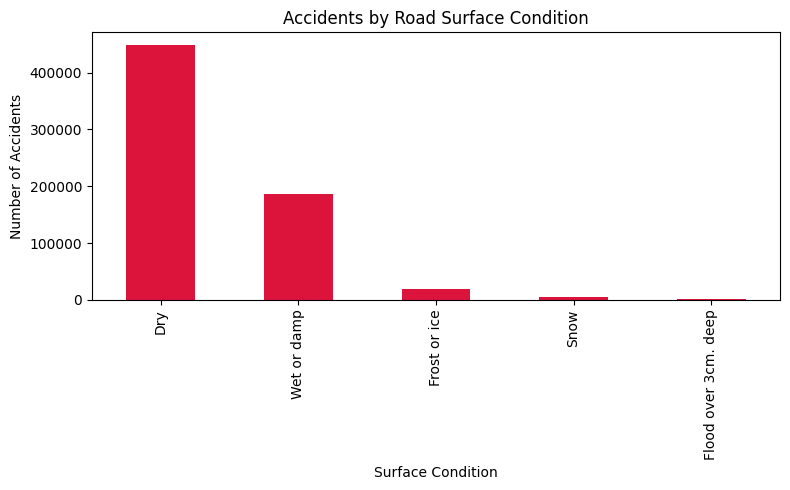

In [35]:
surface_counts = accident['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(8,5))
surface_counts.plot(kind='bar', color='crimson')
plt.title('Accidents by Road Surface Condition')
plt.xlabel('Surface Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Visualization 5: Accidents by Road Surface Condition
This chart shows the number of accidents for each road surface condition.

In [ ]:
light_counts = accident['Light_Conditions'].value_counts()
plt.figure(figsize=(8,5))
light_counts.plot(kind='bar', color='orchid')
plt.title('Accidents by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Visualization 6: Accidents by Light Condition
This chart shows the number of accidents under different light conditions (daylight, darkness, etc.).

### Visualization 7: Accidents by Weather Condition
This chart shows the number of accidents under different weather conditions.